In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
arr2= np.load('data_array_formatted.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[0.003947365799861489 0.027369683484445913 0.1383737517831669 ... 0 0 0]
 [0.021052629002770076 0.05163376910306254 0.14122681883024252 ... 0 1 0]
 [0.003947365799861489 0.004640614264768108 0.19115549215406563 ... 1 0 0]
 ...
 [0.05263157645429362 0.013200240283036896 0.16690442225392296 ... 1 0 0]
 [0.09210526076869806 0.04963356512358402 0.19543509272467904 ... 1 0 0]
 [0.001973681584141267 0.012877102478217349 0.11269614835948645 ... 0 1 0]] ['Average' 'Average' 'Average' ... 'Average' 'Average' 'Average']
5253 5253 1314 1314


# SVM Linear

Best parameters set found on development set:
 {'C': 1000}

 Best Score 0.359145551065324

 Grid scores on development set:
0.299 (+/-0.004) for {'C': 1}
0.299 (+/-0.004) for {'C': 10}
0.301 (+/-0.004) for {'C': 100}
0.359 (+/-0.059) for {'C': 1000}
Detailed classification report:
The scores are computed on the full evaluation set. 

              precision    recall  f1-score   support

     Average       0.79      0.97      0.87      1019
         Bad       0.43      0.05      0.08       191
        Good       0.46      0.16      0.24       104

    accuracy                           0.77      1314
   macro avg       0.56      0.39      0.40      1314
weighted avg       0.71      0.77      0.71      1314


Testing score:  0.39849698720031923

Training Score:  0.37926532928577217


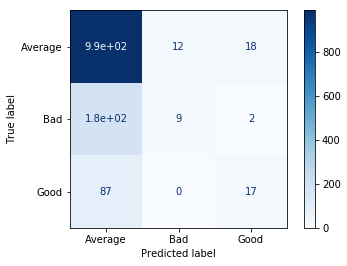

In [3]:
from sklearn.svm import LinearSVC #Use the optimized Linear SVC
#Grid Search
tuned_parameters = [{'C': [1, 10, 100, 1000]}]

clf = GridSearchCV(LinearSVC(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [4]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.41643967 0.35804766 0.30181548 0.22428654 0.42070959]


### K best Data

In [5]:
#Load Kbest data
arr2= np.load('data_kBest.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]] ['Average' 'Average' 'Average' ... 'Average' 'Average' 'Average']
5253 5253 1314 1314


Best parameters set found on development set:
 {'C': 1000}

 Best Score 0.29759829611291966

 Grid scores on development set:
0.296 (+/-0.000) for {'C': 1}
0.296 (+/-0.000) for {'C': 10}
0.296 (+/-0.000) for {'C': 100}
0.298 (+/-0.009) for {'C': 1000}
Detailed classification report:
The scores are computed on the full evaluation set. 

              precision    recall  f1-score   support

     Average       0.78      1.00      0.87      1019
         Bad       0.00      0.00      0.00       191
        Good       0.00      0.00      0.00       104

    accuracy                           0.78      1314
   macro avg       0.26      0.33      0.29      1314
weighted avg       0.60      0.78      0.68      1314


Testing score:  0.29118445492213174

Training Score:  0.2956134774316593


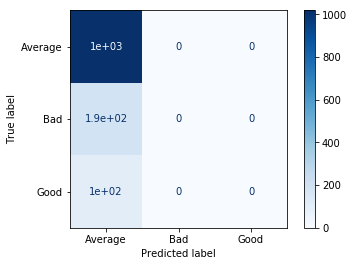

In [6]:
#Grid Search
tuned_parameters = [{'C': [1, 10, 100, 1000]}]

clf = GridSearchCV(LinearSVC(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [7]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.29469214 0.36651582 0.29481733 0.29481733 0.2946593 ]


### K select Percentile

In [8]:
#Load Kbest data
arr2= np.load('data_select_percentile.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[0.003947365799861489 0.027369683484445913 0.1383737517831669 0 0]
 [0.021052629002770076 0.05163376910306254 0.14122681883024252 0 1]
 [0.003947365799861489 0.004640614264768108 0.19115549215406563 1 0]
 ...
 [0.05263157645429362 0.013200240283036896 0.16690442225392296 1 0]
 [0.09210526076869806 0.04963356512358402 0.19543509272467904 1 0]
 [0.001973681584141267 0.012877102478217349 0.11269614835948645 0 1]] ['Average' 'Average' 'Average' ... 'Average' 'Average' 'Average']
5253 5253 1314 1314


Best parameters set found on development set:
 {'C': 10}

 Best Score 0.3008692026645624

 Grid scores on development set:
0.299 (+/-0.004) for {'C': 1}
0.301 (+/-0.004) for {'C': 10}
0.299 (+/-0.004) for {'C': 100}
0.290 (+/-0.030) for {'C': 1000}
Detailed classification report:
The scores are computed on the full evaluation set. 

              precision    recall  f1-score   support

     Average       0.77      1.00      0.87      1019
         Bad       0.00      0.00      0.00       191
        Good       0.00      0.00      0.00       104

    accuracy                           0.77      1314
   macro avg       0.26      0.33      0.29      1314
weighted avg       0.60      0.77      0.68      1314


Testing score:  0.2907010014306151

Training Score:  0.3044175172924019


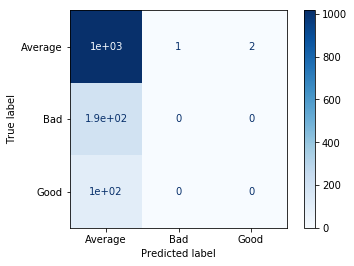

In [9]:
#Grid Search
tuned_parameters = [{'C': [1, 10, 100, 1000]}]

clf = GridSearchCV(LinearSVC(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [10]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.29469214 0.29469214 0.33396232 0.30851541 0.30008474]


### PCA

In [11]:
#Load Kbest data
arr2= np.load('data_pca.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[-0.2668990480532727 0.7955195541058508 -0.31189174404518605
  -0.06279000616091403]
 [-0.11249211937670339 0.11386167290926646 0.7960057304498621
  -0.566522736475527]
 [0.7533508178888383 -0.16531012330588044 -0.13103281872338923
  -0.029475859314786697]
 ...
 [0.7521852812229466 -0.16344152965792963 -0.13094237177940624
  -0.025483097537655243]
 [0.7517777704386579 -0.1613423366153525 -0.13139539788714713
  -0.020865925132946238]
 [-0.11242004274209731 0.11253824516972548 0.7963608411917731
  -0.5693779640319709]] ['Average' 'Average' 'Average' ... 'Average' 'Average' 'Average']
5253 5253 1314 1314


Best parameters set found on development set:
 {'C': 1000}

 Best Score 0.32150280671618975

 Grid scores on development set:
0.296 (+/-0.000) for {'C': 1}
0.296 (+/-0.000) for {'C': 10}
0.296 (+/-0.000) for {'C': 100}
0.322 (+/-0.039) for {'C': 1000}
Detailed classification report:
The scores are computed on the full evaluation set. 

              precision    recall  f1-score   support

     Average       0.79      0.92      0.85      1019
         Bad       0.00      0.00      0.00       191
        Good       0.01      0.01      0.01       104

    accuracy                           0.72      1314
   macro avg       0.27      0.31      0.29      1314
weighted avg       0.62      0.72      0.66      1314


Testing score:  0.28726194728007964

Training Score:  0.2956675751082685


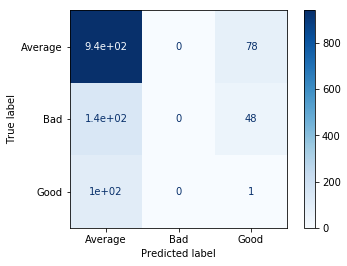

In [12]:
#Grid Search
tuned_parameters = [{'C': [1, 10, 100, 1000]}]

clf = GridSearchCV(LinearSVC(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [13]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.29469214 0.36651582 0.35524357 0.29481733 0.40665368]
